In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

# Rede Neural Profunda - Autoencoder

In [2]:
# Importando bade de dados
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [3]:
# Convertendo e normalizando dados
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
# Realisando redimencinamento 
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

In [5]:
# Criando estrutura da rede neural
# 784 - 128 - 64 - 32 - 64 - 128 - 784
autoencoder = Sequential()
# Encode
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))
# Decode
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
# Compilando rede neural
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Treinamento e teste do modelo
autoencoder.fit(previsores_treinamento, previsores_treinamento, epochs = 50, batch_size = 256, validation_data = (previsores_teste, previsores_teste))

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.3374 - accuracy: 0.0085 - val_loss: 0.1684 - val_accuracy: 0.0132
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1600 - accuracy: 0.0126 - val_loss: 0.1366 - val_accuracy: 0.0116
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1348 - accuracy: 0.0102 - val_loss: 0.1236 - val_accuracy: 0.0141
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1228 - accuracy: 0.0130 - val_loss: 0.1158 - val_accuracy: 0.0121
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1154 - accuracy: 0.0121 - val_loss: 0.1107 - val_accuracy: 0.0120
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1109 - accuracy: 0.0135 - val_loss: 0.1067 - val_accuracy: 0.0122
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1073 - accuracy: 0.0117 - val_loss: 0.1034 - val_accuracy: 0.0092

In [6]:
# Resumo do modelo criado autoencoder
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [7]:
# Encoder baseado no modelo autoencoder
dimensao_original = Input(shape=(784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
encoder = Model(dimensao_original, camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))

In [8]:
# Resumo do modelo criado encoder
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Testando enconder e decoder
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

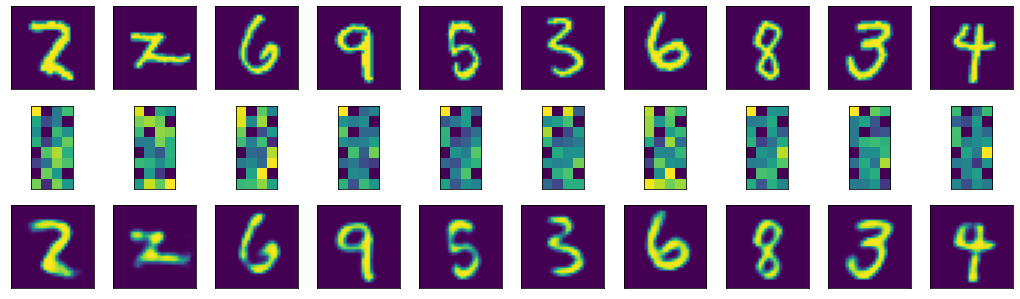

In [10]:
# Visualizando resultados
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)

plt.figure(figsize = (18, 18))

for i, indice_imagem in enumerate(imagens_teste):   
    # Imagem original
    eixo = plt.subplot(10, 10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada
    eixo = plt.subplot(10, 10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())
    
     # Imagem reconstruída
    eixo = plt.subplot(10, 10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())